In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
training_set = dataset_train.iloc[:,1:2].values  
#Only considering the open_column because that is what we will be predictingin this model


In [5]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [7]:
#We perform feature scaling to scale down the values to the same range
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc=MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [11]:
X_train = []
Y_train=[]

#Create data structure with 60 time steps and 1 output that is each of my input evctor will have 60 readings
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    Y_train.append(training_set_scaled[i,0])
X_train,Y_train = np.array(X_train),np.array(Y_train)

#So in this preprocessing step we make an array with 60 elements and then the 61st element is our output.
#We do this thing in a sequence such that in each consecutive array the last element was output for the previous array.

In [12]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
Y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
len(X_train)

1198

In [15]:
len(Y_train)

1198

In [16]:
#Reshape the data according to input shape of keras documentation
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
#Input format according to keras documentation : (batch_size, timestep, dimension)

In [17]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/home/varun/Python_Environments/AI_game/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/varun/Python_Environments/AI_game/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/varun/Python_Environments/AI_game/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home

In [26]:
regressor = Sequential()

In [27]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [28]:
regressor.add(LSTM(units=50,return_sequences =True))
regressor.add(Dropout(0.2))

In [29]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [30]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [31]:
regressor.add(Dense(units=1))

In [32]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [33]:
regressor.fit(X_train,Y_train,epochs = 50, batch_size=32)

Epoch 1/50
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0521
Epoch 2/50
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0061
Epoch 3/50
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 4/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 5/50
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 6/50
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0045
Epoch 7/50
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 8/50
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 9/50
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 10/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 11/50
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 12/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
E

In [23]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [24]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

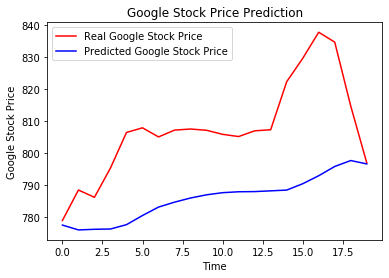

In [25]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [40]:
predicted_stock_price

array([[788.23816],
       [785.74927],
       [785.44336],
       [786.3645 ],
       [789.27795],
       [794.7899 ],
       [800.5874 ],
       [804.0711 ],
       [805.55145],
       [805.793  ],
       [805.40784],
       [804.68036],
       [803.9277 ],
       [803.8246 ],
       [804.3196 ],
       [808.0447 ],
       [814.378  ],
       [821.95404],
       [827.30176],
       [825.6316 ]], dtype=float32)

In [20]:
#Using a different regressor model for this application:

regressor.add(LSTM(128, input_shape=(X_train.shape[1],1), return_sequences=True)) 
 
regressor.add(LSTM(64, return_sequences=False)) 
 
regressor.add(Dense(16,init='uniform',activation='relu')) 
 
regressor.add(Dense(1,init='uniform',activation='linear')) 

/home/varun/Python_Environments/AI_game/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  """
/home/varun/Python_Environments/AI_game/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")`
  import sys
